<a href="https://colab.research.google.com/github/PallaviSundar/AIML-Programs/blob/main/capstoneDS1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Energy Consumption Forcasting in Smart Homes
dataset - /content/household_power_consumption.csv

In [22]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [23]:
df = pd.read_csv('/content/household_power_consumption.csv')
df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0,1,17.0
1,16/12/2006,17:25:00,5.36,0.436,233.63,23,0,1,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23,0,2,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23,0,1,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0,1,17.0
...,...,...,...,...,...,...,...,...,...
1048570,13/12/2008,21:34:00,0.426,0.076,242.27,1.8,0,0,0.0
1048571,13/12/2008,21:35:00,0.424,0.076,242.1,1.8,0,0,0.0
1048572,13/12/2008,21:36:00,0.422,0.076,241.73,1.8,0,0,0.0
1048573,13/12/2008,21:37:00,0.422,0.078,242.56,1.8,0,0,0.0


In [24]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0,1,17.0
1,16/12/2006,17:25:00,5.36,0.436,233.63,23,0,1,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23,0,2,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23,0,1,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0,1,17.0


In [25]:
df.tail()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1048570,13/12/2008,21:34:00,0.426,0.076,242.27,1.8,0,0,0.0
1048571,13/12/2008,21:35:00,0.424,0.076,242.1,1.8,0,0,0.0
1048572,13/12/2008,21:36:00,0.422,0.076,241.73,1.8,0,0,0.0
1048573,13/12/2008,21:37:00,0.422,0.078,242.56,1.8,0,0,0.0
1048574,13/12/2008,21:38:00,0.422,0.078,242.61,1.8,0,0,0.0


In [26]:
df.describe()

,Sub_metering_3
count,1.044506e+06
mean,5.933837e+00
std,8.210398e+00
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,1.700000e+01
max,3.100000e+01


In [27]:
df.shape

(1048575, 9)

In [28]:
df.isnull().sum()

,0
Date,0
Time,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,0
Sub_metering_3,4069


In [44]:
df = df.fillna(df.mean())
df.isnull().sum()

,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_2,0
Sub_metering_1,0
Sub_metering_3,0


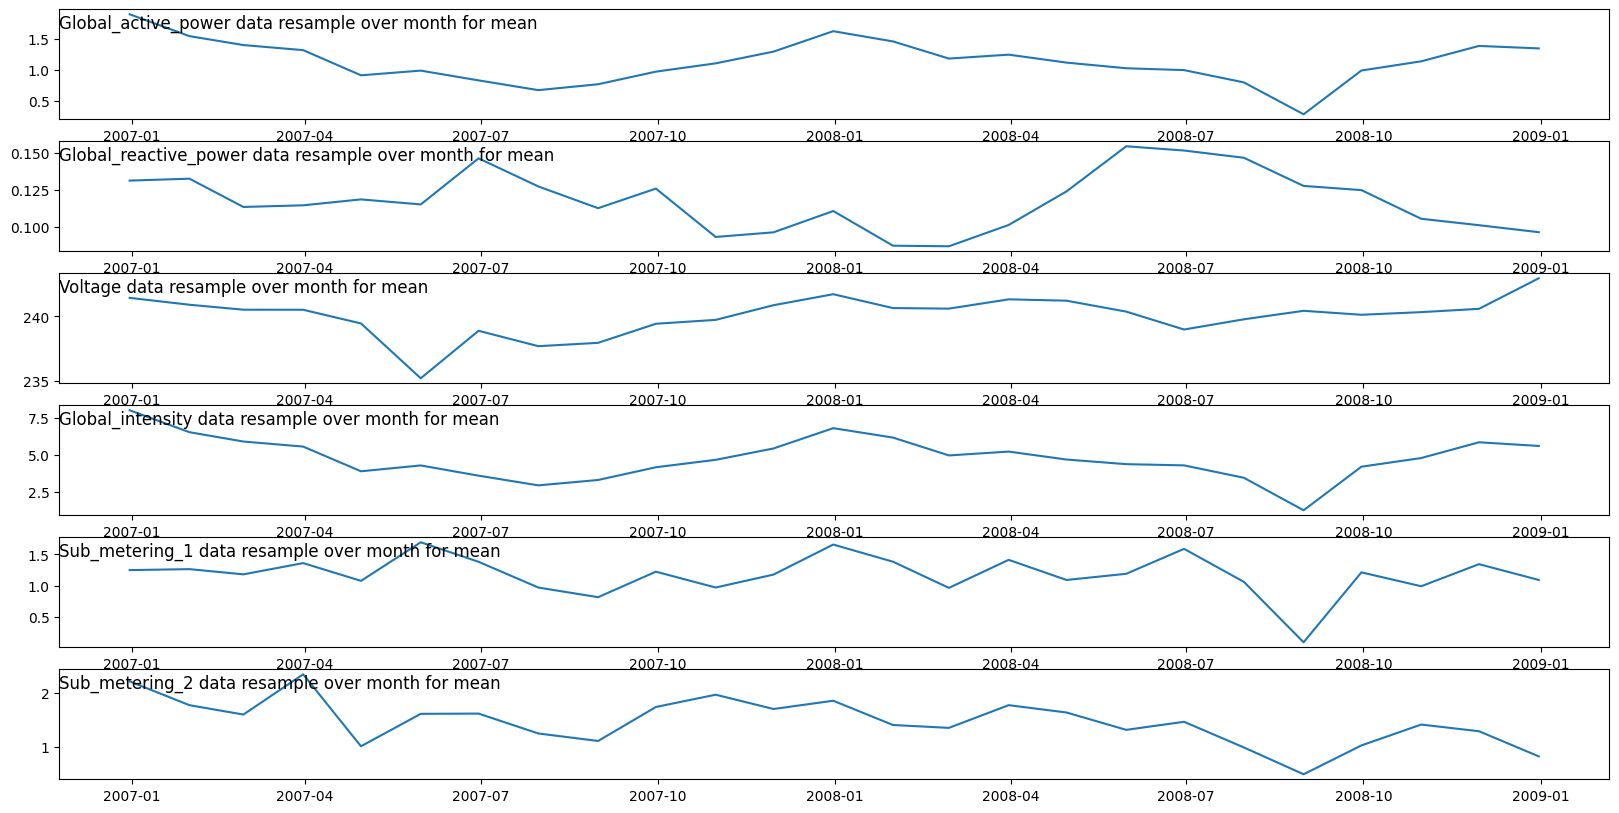

In [45]:
import matplotlib.pyplot as plt

i = 1
cols=['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2']
plt.figure(figsize=(20, 10))
for col in cols:
    plt.subplot(len(cols), 1, i)
    plt.plot(df.resample('ME').mean()[col])
    plt.title(col + ' data resample over month for mean', y=0.75, loc='left')
    i += 1
plt.show()

In [46]:
df = pd.read_csv('/content/household_power_consumption.csv',
                 low_memory=False, na_values=['nan','?'])
df['dt'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce', dayfirst=True)
df = df.set_index('dt')
df = df.drop(['Date', 'Time'], axis=1)
display(df.head())

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


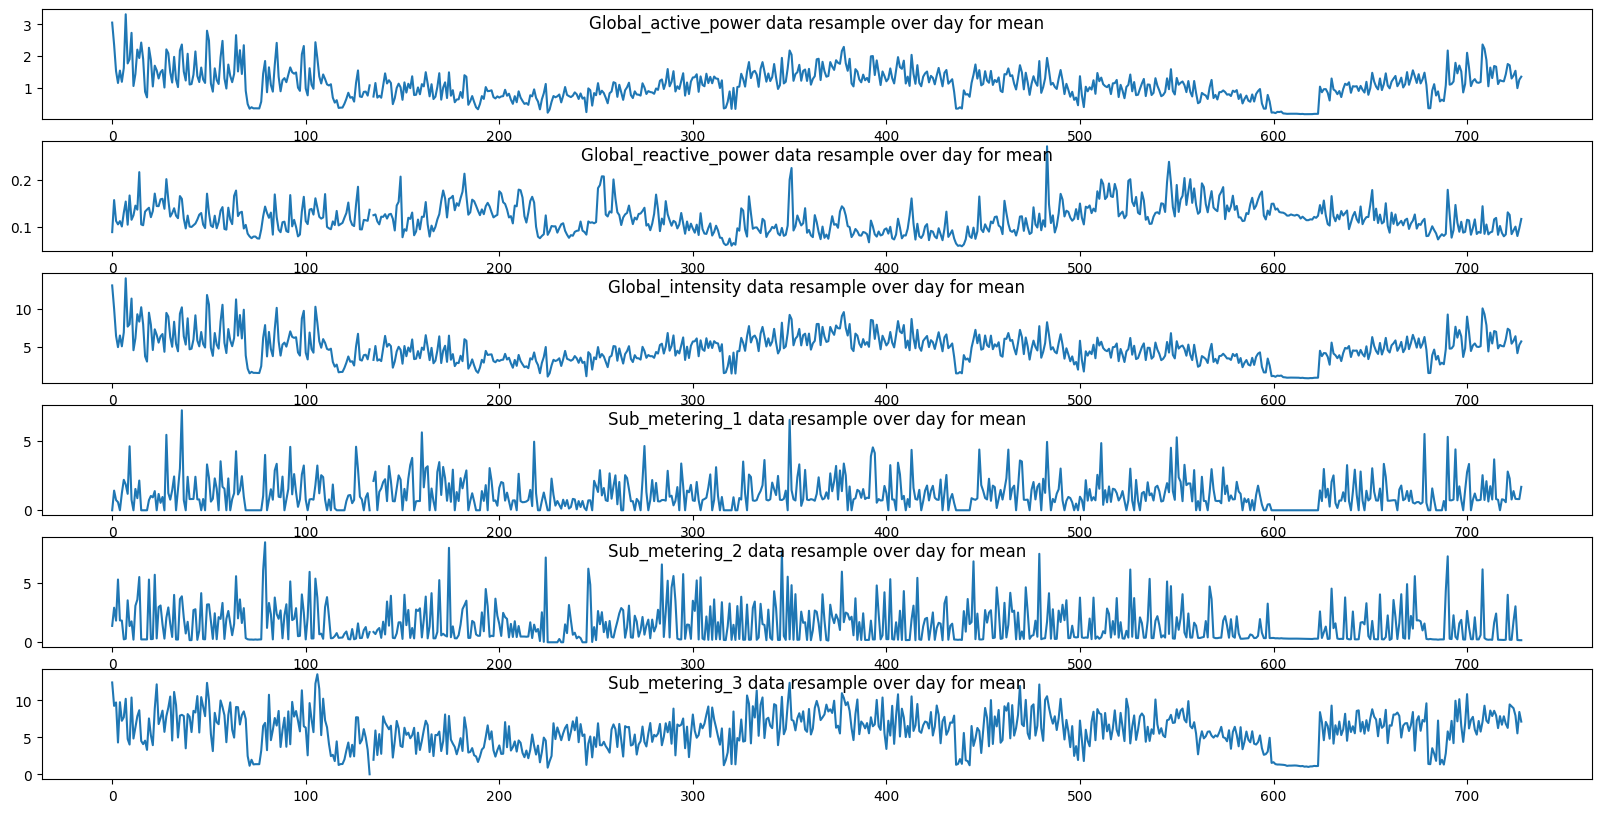

In [47]:
i = 1
cols=[0, 1, 3, 4, 5, 6]
plt.figure(figsize=(20, 10))
for col in cols:
    plt.subplot(len(cols), 1, i)
    plt.plot(df.resample('D').mean().values[:, col])
    plt.title(df.columns[col] + ' data resample over day for mean', y=0.75, loc='center')
    i += 1
plt.show()

/tmp/ipython-input-4089097003.py:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  plt.plot(df.resample('H').mean().values[:, col])


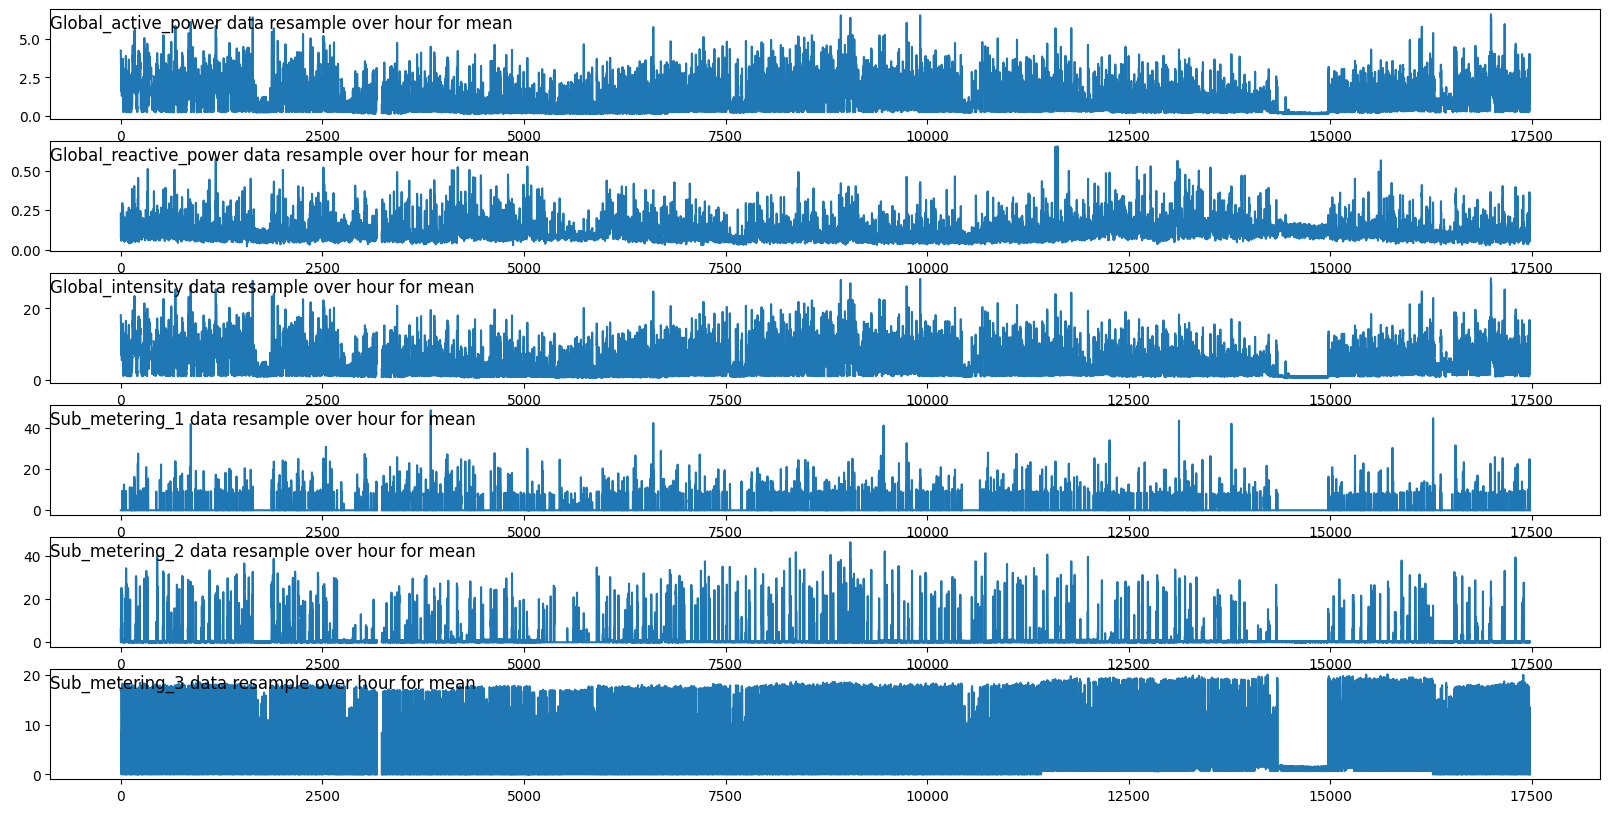

In [48]:
i = 1
cols=[0, 1, 3, 4, 5, 6]
plt.figure(figsize=(20, 10))
for col in cols:
    plt.subplot(len(cols), 1, i)
    plt.plot(df.resample('H').mean().values[:, col])
    plt.title(df.columns[col] + ' data resample over hour for mean', y=0.75, loc='left')
    i += 1
plt.show()

In [49]:
df.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Global_active_power,1.000000,0.254841,-0.400987,0.999020,0.474129,0.456677,0.624107
Global_reactive_power,0.254841,1.000000,-0.120617,0.271843,0.137682,0.150528,0.076274
Voltage,-0.400987,-0.120617,1.000000,-0.411298,-0.203805,-0.178899,-0.284932
Global_intensity,0.999020,0.271843,-0.411298,1.000000,0.478198,0.462192,0.613220
Sub_metering_1,0.474129,0.137682,-0.203805,0.478198,1.000000,0.060830,0.115600
Sub_metering_2,0.456677,0.150528,-0.178899,0.462192,0.060830,1.000000,0.106461
Sub_metering_3,0.624107,0.076274,-0.284932,0.613220,0.115600,0.106461,1.000000


/tmp/ipython-input-1443994500.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dfm = df.resample('M').mean()
/tmp/ipython-input-1443994500.py:15: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dfh = df.resample('H').mean()


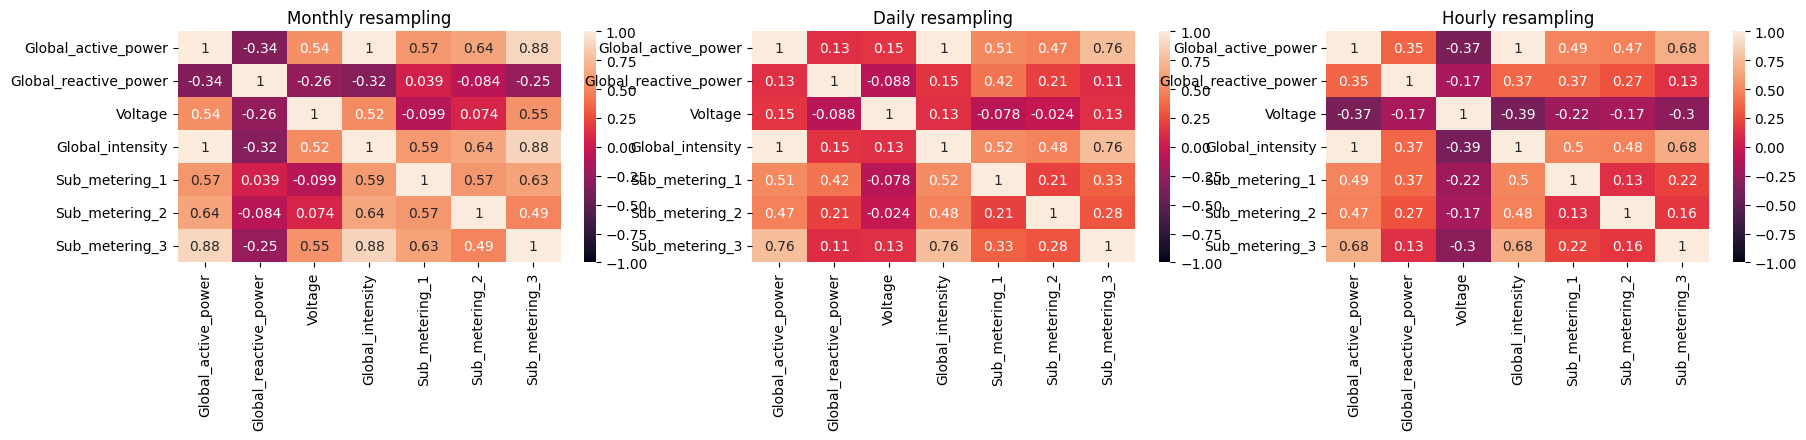

In [50]:
import seaborn as sns
f= plt.figure(figsize=(21,3))

ax=f.add_subplot(131)
dfm = df.resample('M').mean()
sns.heatmap(dfm.corr(), vmin=-1, vmax=1, annot=True)
plt.title('Monthly resampling', size=12)

ax=f.add_subplot(132)
dfd = df.resample('D').mean()
sns.heatmap(dfd.corr(), vmin=-1, vmax=1, annot=True)
plt.title('Daily resampling', size=12)

ax=f.add_subplot(133)
dfh = df.resample('H').mean()
sns.heatmap(dfh.corr(), vmin=-1, vmax=1, annot=True)
plt.title('Hourly resampling', size=12)
plt.show()

In [51]:
df = df[['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_2', 'Sub_metering_1','Sub_metering_3']]

In [52]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    dff = pd.DataFrame(data)
    cols, names = list(), list()
    for i in range(n_in, 0, -1):
        cols.append(dff.shift(-i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    for i in range(0, n_out):
        cols.append(dff.shift(-i))
        if i==0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1)) for j in range(n_vars)]
        agg = pd.concat(cols, axis=1)
        agg.columns = names
        if dropnan:
            agg.dropna(inplace=True)
        return agg

In [53]:
df_resample = df.resample('h').mean()
df_resample.shape

(17477, 7)

In [54]:
from sklearn.preprocessing import MinMaxScaler

values = df_resample.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, 1, 1)
r = list(range(df_resample.shape[1]+1, 2*df_resample.shape[1]))
reframed.drop(reframed.columns[r], axis=1, inplace=True)
reframed.head()

# Data spliting into train and test data series. Only 4000 first data points are selected for traing purpose.
values = reframed.values
n_train_time = 400  # Adjusted train data size
if n_train_time >= len(values):
    raise ValueError("n_train_time is too large for the dataset size.")
train = values[:n_train_time, :]
test = values[n_train_time:, :]
train_x, train_y = train[:, :-1], train[:, -1]
test_x, test_y = test[:, :-1], test[:, -1]
train_x = train_x.reshape((train_x.shape[0], 1, train_x.shape[1]))
test_x = test_x.reshape((test_x.shape[0], 1, test_x.shape[1]))

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 - 3s - 492ms/step - loss: 0.1059 - val_loss: 0.0336
Epoch 2/100
6/6 - 1s - 162ms/step - loss: 0.0721 - val_loss: 0.0218
Epoch 3/100
6/6 - 1s - 210ms/step - loss: 0.0478 - val_loss: 0.0163
Epoch 4/100
6/6 - 1s - 117ms/step - loss: 0.0324 - val_loss: 0.0162
Epoch 5/100
6/6 - 1s - 212ms/step - loss: 0.0244 - val_loss: 0.0195
Epoch 6/100
6/6 - 2s - 323ms/step - loss: 0.0219 - val_loss: 0.0233
Epoch 7/100
6/6 - 1s - 127ms/step - loss: 0.0215 - val_loss: 0.0250
Epoch 8/100
6/6 - 1s - 204ms/step - loss: 0.0215 - val_loss: 0.0243
Epoch 9/100
6/6 - 1s - 209ms/step - loss: 0.0207 - val_loss: 0.0222
Epoch 10/100
6/6 - 1s - 211ms/step - loss: 0.0197 - val_loss: 0.0199
Epoch 11/100
6/6 - 1s - 118ms/step - loss: 0.0191 - val_loss: 0.0183
Epoch 12/100
6/6 - 1s - 92ms/step - loss: 0.0185 - val_loss: 0.0171
Epoch 13/100
6/6 - 1s - 117ms/step - loss: 0.0181 - val_loss: 0.0166
Epoch 14/100
6/6 - 1s - 210ms/step - loss: 0.0178 - val_loss: 0.0164
Epoch 15/100
6/6 - 1s - 117ms/step - loss: 0.0174 - val_

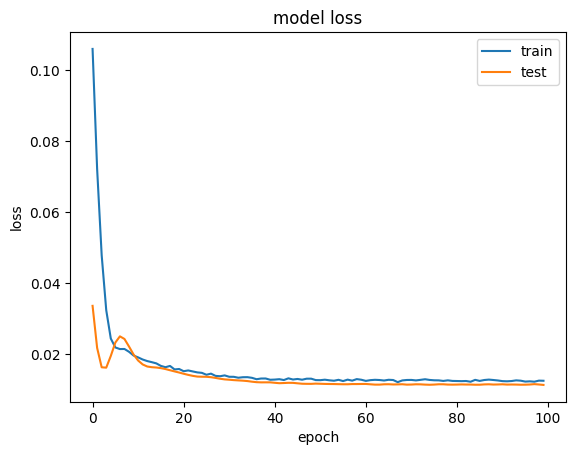

532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Test RMSE: 0.687


In [55]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import numpy as np

model = Sequential()
model.add(LSTM(100, input_shape=(train_x.shape[1], train_x.shape[2])))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Network fitting
history = model.fit(train_x, train_y, epochs=100, batch_size=70, validation_data=(test_x, test_y), verbose=2, shuffle=False)

# Loss history plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

size = df_resample.shape[1]

# Prediction test
yhat = model.predict(test_x)
test_x = test_x.reshape((test_x.shape[0], size))

# invert scaling for prediction
inv_yhat = np.concatenate((yhat, test_x[:, 1-size:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_x[:, 1-size:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

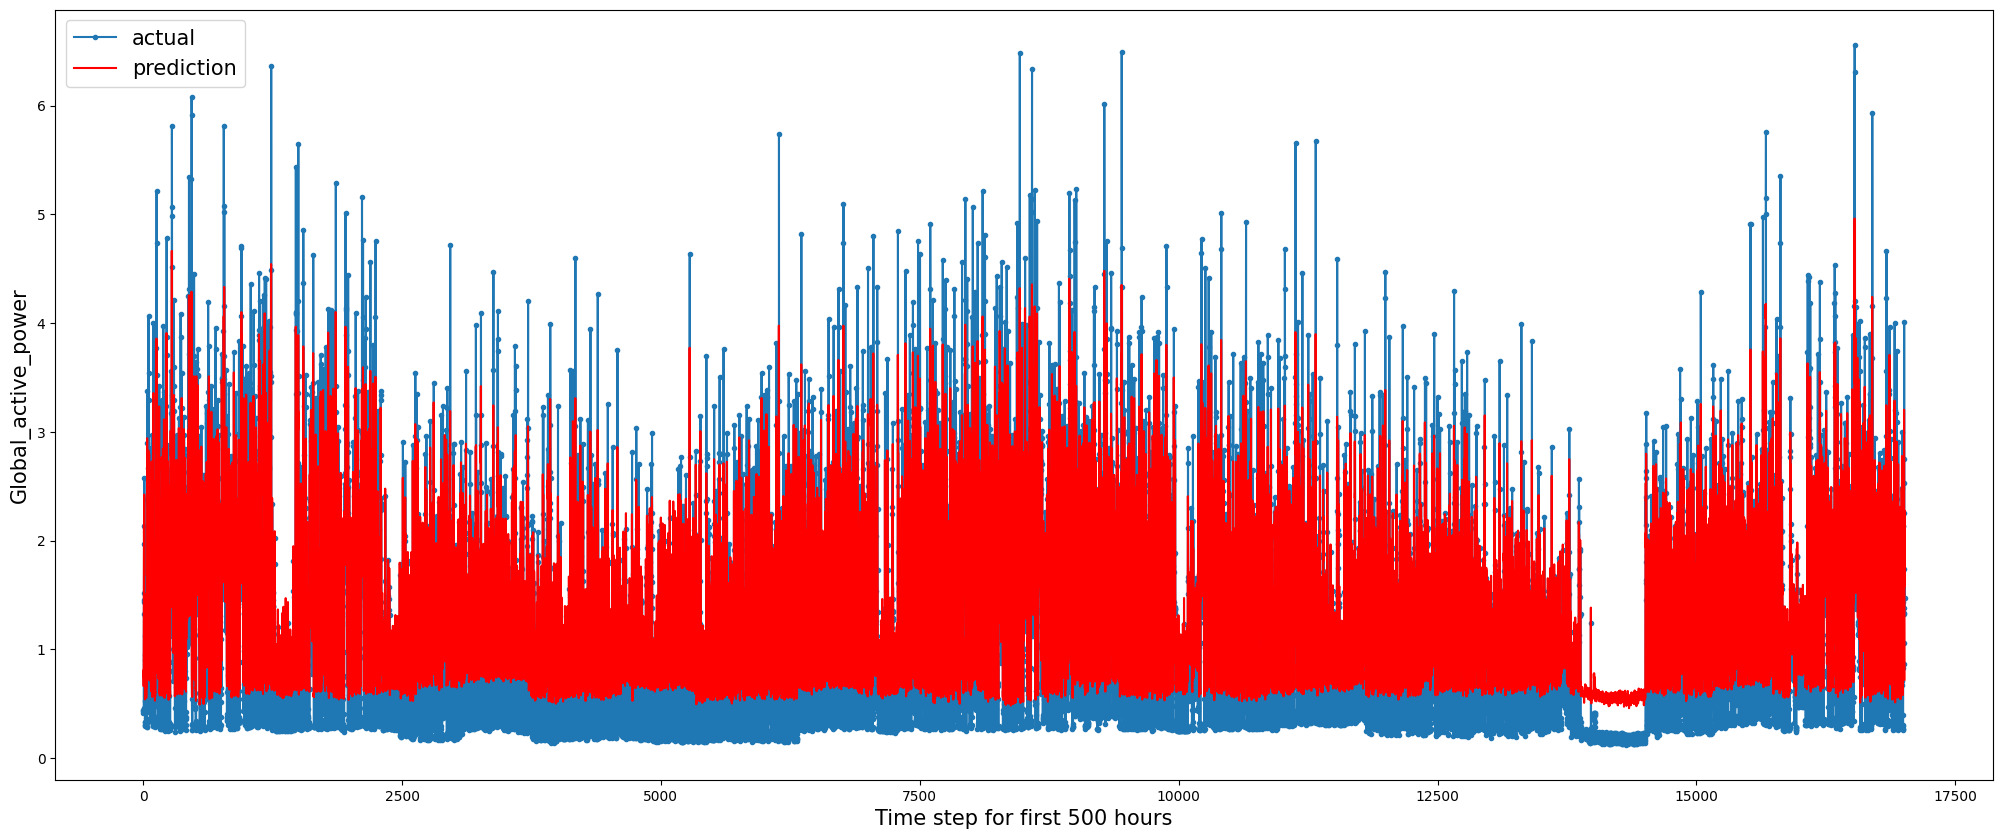

In [42]:
aa=[x for x in range(len(inv_y))]
plt.figure(figsize=(25,10))
plt.plot(aa, inv_y, marker='.', label="actual")
plt.plot(aa, inv_yhat, 'r', label="prediction")
plt.ylabel(df.columns[0], size=15)
plt.xlabel('Time step for first 500 hours', size=15)
plt.legend(fontsize=15)
plt.show()

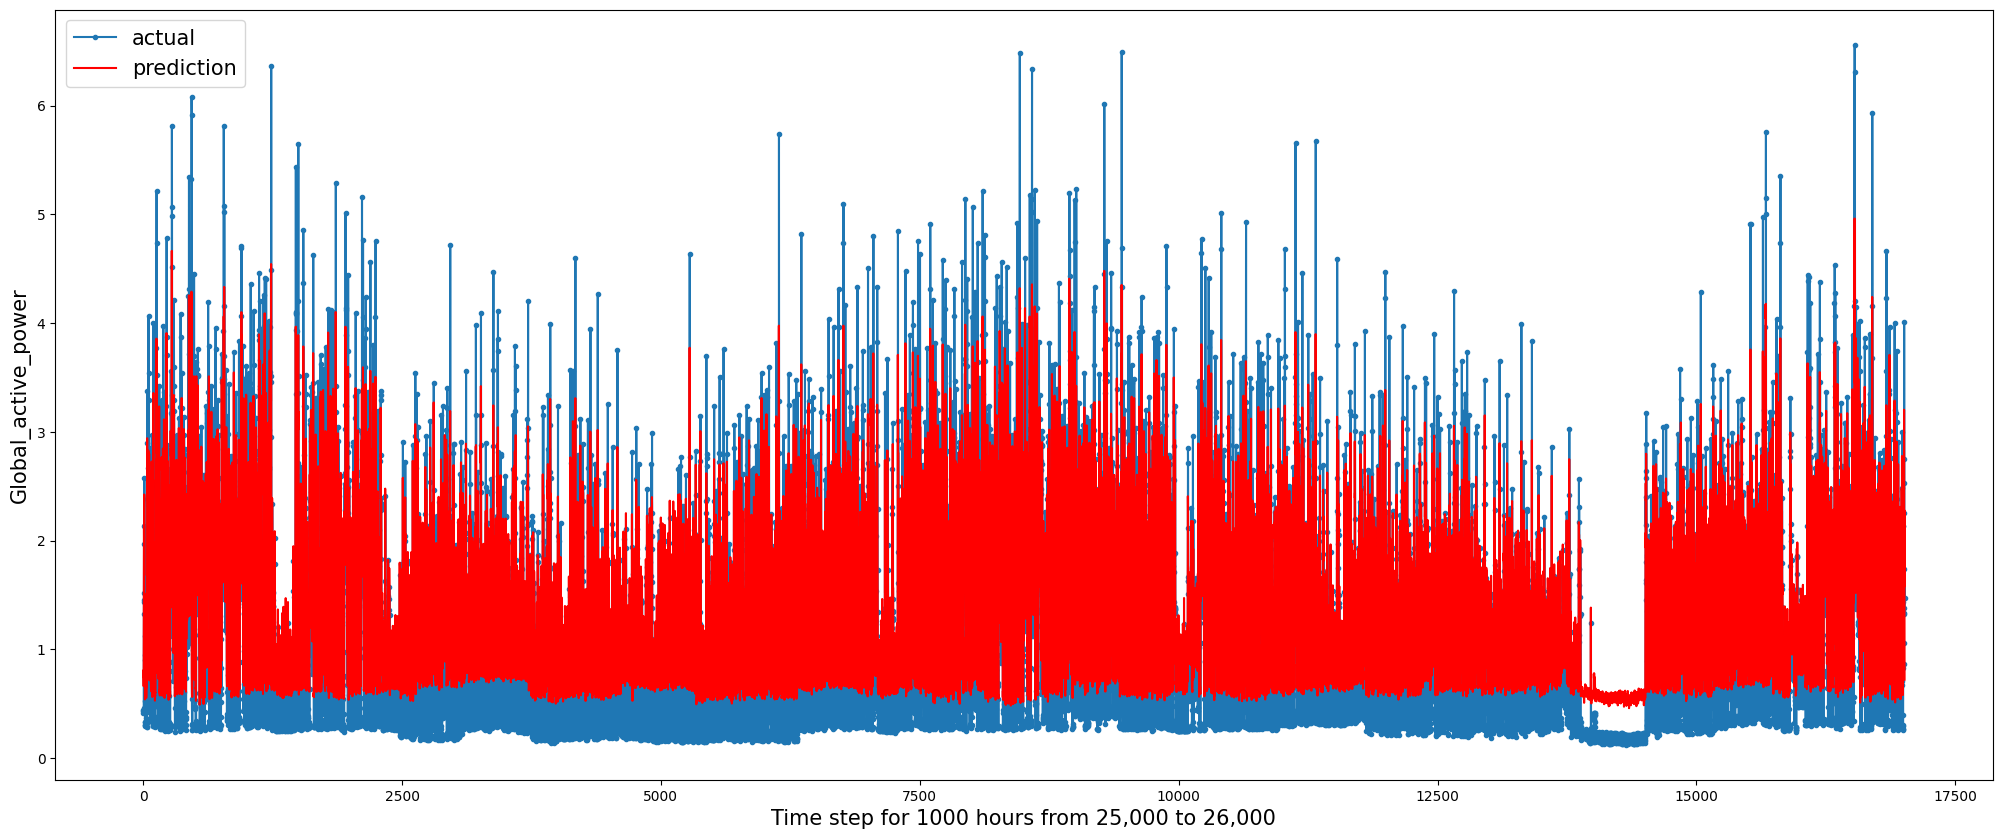

In [43]:
aa=[x for x in range(len(inv_y))]
plt.figure(figsize=(25,10))
plt.plot(aa, inv_y, marker='.', label="actual")
plt.plot(aa, inv_yhat, 'r', label="prediction")
plt.ylabel(df.columns[0], size=15)
plt.xlabel('Time step for 1000 hours from 25,000 to 26,000', size=15)
plt.legend(fontsize=15)
plt.show()